<a href="https://colab.research.google.com/github/germanfarinas/AI-Project3/blob/master/AI_project3_mediumdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo AI project 3 Medium dataset (~300 training samples)

In [0]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import os   # to save the checkpoint
import pandas as pd
#sess = tf.InteractiveSession()

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = r"/content/gdrive/My Drive/Colab Notebooks/Data"  #change dir to your project folder
os.chdir(root_path)
os.getcwd()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'/content/gdrive/My Drive/Colab Notebooks/Data'

# Example 1 Ionospheric Dataset

In [0]:
#Prepare the data
def read_dataset():
  file = "ionosphere.txt"
  data = pd.read_csv(file,delim_whitespace=False,header=-1)
  data = np.array(data)
  data
  #np.random.shuffle(data)
  # #Training Data
  ratio = 0.8 # train/Total
  training_data = data[0:int(len(data)*ratio)]
  training_data
  testing_data = data[int(len(data)*ratio):len(data)]
  x_train = training_data[:, 0:34]
  y_train = x_train.astype(float)
  y_train = training_data[:, 34:35]
  y_train = y_train.T[0]=='g'
  y_train = y_train.astype(int)
  #Testing Data
  x_test = testing_data[:, 0:34]
  x_test = x_test.astype(float)
  y_test = testing_data[:, 34:35]
  y_test = y_test.T[0]=='g'
  y_test = y_test.astype(int)
  return x_train,y_train,x_test,y_test

def create_model(N_input,N_hidden,N_output):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(N_hidden,input_dim = N_input, activation='relu')) 
  model.add(tf.keras.layers.Dense(N_output, activation='sigmoid'))
  
  model.compile(loss='mean_squared_error',
             optimizer='sgd',
             metrics=['accuracy'])
  
  return model

In [4]:
x_train, y_train, x_test, y_test = read_dataset()
print('Training data size:' + str(x_train.shape))
print('Training labels size: ' + str(y_train.shape))
print('Test data size: ' + str(x_test.shape))
print('Test label size: ' + str(y_test.shape))

Training data size:(280, 34)
Training labels size: (280,)
Test data size: (71, 34)
Test label size: (71,)


In [5]:
labels = ['b','g']
print(labels)
print(y_train[0], labels[y_train[0]])

['b', 'g']
1 g


In [6]:
# Convert the labels to one-hot vectors
print(y_train[0:5])
y_train = tf.keras.utils.to_categorical(y_train, 2)  # 10 classes
y_test = tf.keras.utils.to_categorical(y_test, 2)
print(y_train[0:5])

[1 0 1 0 1]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [7]:
model = create_model(34,5,2)
#model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 175       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 12        
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [9]:
n_iteration = 50
model.fit(x_train, y_train, batch_size=10, epochs=n_iteration, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
280/280 [==============================] - 0s 1ms/sample - loss: 0.3006 - acc: 0.3750
Epoch 2/50
280/280 [==============================] - 0s 263us/sample - loss: 0.2936 - acc: 0.3571
Epoch 3/50
280/280 [==============================] - 0s 270us/sample - loss: 0.2877 - acc: 0.3429
Epoch 4/50
280/280 [==============================] - 0s 296us/sample - loss: 0.2825 - acc: 0.3321
Epoch 5/50
280/280 [==============================] - 0s 264us/sample - loss: 0.2779 - acc: 0.3286
Epoch 6/50
280/280 [==============================] - 0s 258us/sample - loss: 0.2739 - acc: 0.3107
Epoch 7/50
280/280 [==============================] - 0s 249us/sample - loss: 0.2705 - acc: 0.3107
Epoch 8/50
280/280 [==============================] - 0s 252us/sample - loss: 0.2677 - acc: 0.3143
Epoch 9/50
280/280 [==============================] - 0s 241us/sample - loss: 0.2656 - acc: 0.3179
Epoch 10/50
280/280 [==============================] - 0s 275us

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy: %f' %test_acc)

71/71 [==============================] - 0s 641us/sample - loss: 0.1925 - acc: 1.0000
Test accuracy: 1.000000


50


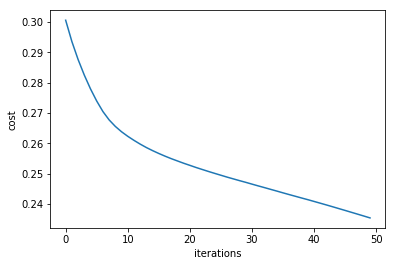

In [11]:
# history. all losses
all_loss = model.history.history['loss'] 
print(len(all_loss))

# show the training errors
plt.plot(np.squeeze(all_loss))
plt.xlabel('iterations');plt.ylabel('cost')
#plt.title('Learning rate %f' %learning_rate)
plt.show()

# PSO Algorithm

In [0]:
def fitness(str_costf,w):
  model_nn.set_weights(w)
  y_hat = model_nn.predict_on_batch(x_train)
  if str_costf == 'LSE':
    cost = np.linalg.norm(y_hat-y_train)**2/(y_train.shape[1]*x_train.shape[0])
  elif str_costf == 'ABS':
    cost = np.sum(np.abs(y_hat-y_train))/(y_train.shape[1]*x_train.shape[0])
  return cost 
def gen_random_weights(NL):
  w = list()
  w_tmp = model_nn.get_weights()
  for i in range(NL):
    w.append(np.random.random_sample(w_tmp[i].shape)*0.8-0.4)
  return w
def list_subst(a,b):
  # c=a-b
  c=list()
  for i in range(len(a)):
    c.append(a[i]-b[i])
  return c
def list_mult(a,const):
  # c=const*a
  c=list()
  for i in range(len(a)):
    c.append(a[i]*const)
  return c 
def list_mult_rand(a,const):
  # c=const*a
  c=list()
  for i in range(len(a)):
    prod = np.multiply(a[i],np.random.random_sample(a[i].shape))
    c.append(prod*const)
  return c
def list_add(*arglist):
  # d=a+b+c
  d=list()
  if len(arglist)==2:
    for i in range(len(arglist[0])):
      d.append(arglist[0][i]+arglist[1][i])
    return d  
  if len(arglist)==3:
    for i in range(len(arglist[0])):
      d.append(arglist[0][i]+arglist[1][i]+arglist[2][i])
    return d 
def list_limit(a,amin,amax):
  c=list()
  for i in range(len(a)):
    c.append(np.clip(a[i],amin,amax))
  return c

In [0]:
#### PSO Algorithm
NL=4
model_nn = create_model(34,10,2)

In [0]:
Nparticles = 200
Nepochs = 30
# Create particles with random weigts matrix
particles = list()
vel_particles = list()
for i in range(Nparticles):
  particles.append(gen_random_weights(NL))
  vel_particles.append(gen_random_weights(NL))

In [28]:
c1=2;c2=2;w=1
p_bestid = particles.copy()
p_best = np.ones(Nparticles)*10
g_bestid = list()
g_best = 10
cost = np.zeros(Nepochs)
#w=np.linspace(2.0, 1.0, num=Nepochs)

#Start trining
for k in range(Nepochs):
  #print("Epoch %2d of %2d , best cost = %% 5.2f" %(k,Nepochs,))
  for i in range(Nparticles):
    fit = fitness('ABS',particles[i])
    #print(fit)
    if fit < p_best[i]:
      p_best[i] = fit
      p_bestid[i] = particles[i].copy()
  idx = np.argmin(p_best)
  g_bestid = p_bestid[idx].copy()
  #print(len(particles[0]))
  for i in range(Nparticles):
    #r1=np.random.rand()
    #r2=np.random.rand()
    p_delx = list_subst(p_bestid[i],particles[i])
    g_delx = list_subst(g_bestid   ,particles[i])
    inertia = list_mult(vel_particles[i],w)
    cognitive = list_mult_rand(p_delx,c1*r1)
    social = list_mult_rand(g_delx,c2*r2)
    vid = list_add(inertia,cognitive,social)
    xid = list_add(particles[i],vid)
    vel_particles[i]=list_limit(vid,-1,1)
    particles[i]=list_limit(xid,-1,1)
  cost[k]=p_best[idx]
  #if cost[k]==cost[k-1]):
  #  w = w*0.9
  #  print(w)
  print("Epoch %2d of %2d , best cost = %8.6f" %(k,Nepochs,cost[k]))
model_nn.set_weights(g_bestid)

Epoch  0 of 30 , best cost = 0.454941
Epoch  1 of 30 , best cost = 0.393514
Epoch  2 of 30 , best cost = 0.333551
Epoch  3 of 30 , best cost = 0.291085
Epoch  4 of 30 , best cost = 0.266664
Epoch  5 of 30 , best cost = 0.247951
Epoch  6 of 30 , best cost = 0.220890
Epoch  7 of 30 , best cost = 0.187336
Epoch  8 of 30 , best cost = 0.156158
Epoch  9 of 30 , best cost = 0.143812
Epoch 10 of 30 , best cost = 0.126748
Epoch 11 of 30 , best cost = 0.111140
Epoch 12 of 30 , best cost = 0.108712
Epoch 13 of 30 , best cost = 0.106244
Epoch 14 of 30 , best cost = 0.101688
Epoch 15 of 30 , best cost = 0.098221
Epoch 16 of 30 , best cost = 0.096275
Epoch 17 of 30 , best cost = 0.094502
Epoch 18 of 30 , best cost = 0.093631
Epoch 19 of 30 , best cost = 0.092080
Epoch 20 of 30 , best cost = 0.088532
Epoch 21 of 30 , best cost = 0.085841
Epoch 22 of 30 , best cost = 0.085525
Epoch 23 of 30 , best cost = 0.085340
Epoch 24 of 30 , best cost = 0.084823
Epoch 25 of 30 , best cost = 0.084696
Epoch 26 of 

In [29]:
model_nn.set_weights(g_bestid)
test_loss, test_acc = model_nn.evaluate(x_test, y_test)
print('Test accuracy: %f' %test_acc)

71/71 [==============================] - 0s 243us/sample - loss: 0.0168 - acc: 0.9718
Test accuracy: 0.971831


##################################
